# Solution of Week 1 Programming Assignment 

Remark: 

The following solution just provides you one way to solve the problems.

=================================================================================================================

### **Problem 1 (1 pt).** Plot the curve of function 
### $$f(x) = x^3 - x,~~ x \in[-1,1].$$

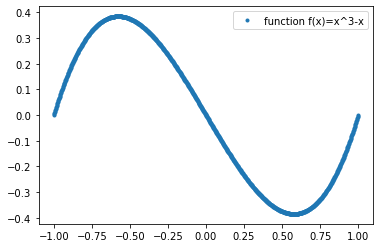

In [5]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import torch
import numpy as np

def f(x):
    return x ** 3 - x 

x=torch.linspace(-1, 1, 1000)

plt.plot(x, f(x), '.', label='function f(x)=x^3-x')
plt.legend()


=================================================================================================================

### **Problem 2 (2 pts).** 
### (1) Find the two roots of the function
### $$f(x) = 2x^2 - x - 1,~~ x \in[-1,2].$$

### (2) Plot the curve of the function $f(x)$ defined in (1) and mark all the roots on the curve.

The one root is: [-0.5]
The other root is: [1.]


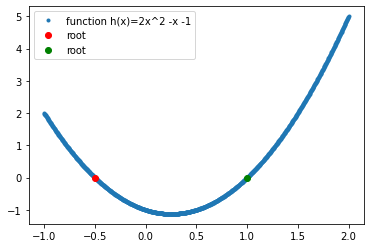

In [7]:
def h(x):
    return 2 * x ** 2 -x - 1
x0 = fsolve(h, -1)
x1 = fsolve(h, 2)
print('The one root is:', x0)
print('The other root is:', x1)

x = np.linspace(-1, 2, 1000)
plt.plot(x, h(x),'.', label='function h(x)=2x^2 -x -1')
plt.plot(x0, h(x0), 'ro',label='root')
plt.plot(x1, h(x1), 'go',label='root')
plt.legend()

=================================================================================================================

### **Problem 3 (optional)**.  Given $P=\begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$, investigate the two different multiplications $P*P$ and $torch.mm(P,P)$.

In [8]:
P = torch.tensor([[1,2],[3,4]],dtype=torch.float32) 
print('P is :', P)



print('P*P is:', P*P) 


print('mm(P,P) is:', torch.mm(P,P)) 

P is : tensor([[1., 2.],
        [3., 4.]])
P*P is: tensor([[ 1.,  4.],
        [ 9., 16.]])
mm(P,P) is: tensor([[ 7., 10.],
        [15., 22.]])


=================================================================================================================

### **Problem 4 (1 pt).**  Given 
### $$A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}, ~~ b=\begin{bmatrix} 1  \\ 2 \\ 3\end{bmatrix}.$$
### Solve $A^2 x = b.$

In [9]:
# You should use torch.mm(A,A) to calculate A^2
# Note that in this example, A is singular and A^2x=b has infinite many solutions, torch.solve() will only give one of the solutions.
# If you use numpy.linalg.inv(), you may get different outputs.
A = torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32) 
print('A^2 is', torch.mm(A,A))


print('\n') 

b = torch.tensor([[1],[2],[3]],dtype=torch.float32) 
print('b is', b)

print('\n') 

x, LU =torch.solve(b,torch.mm(A,A)) 
print('x is', x)


A^2 is tensor([[ 30.,  36.,  42.],
        [ 66.,  81.,  96.],
        [102., 126., 150.]])


b is tensor([[1.],
        [2.],
        [3.]])


x is tensor([[-0.0010],
        [ 0.2241],
        [-0.1676]])


=================================================================================================================

### **Problem 5 (1 pt).**  Given $f(x,y) = x^2+y^2+(xy)^3$, compute $\frac{\partial f(x,y)}{\partial y}$ at $x=1,y=2$.

In [10]:
x = torch.tensor([1.0])
y = torch.tensor([2.0],requires_grad=True)


z = x**2 + y ** 2 + (x*y)**3

grad = torch.autograd.grad(outputs=z, inputs=y) 
print(grad)

(tensor([16.]),)


=================================================================================================================


### **Problem 6 (optional).** Define a function to find the minimum of three numbers $a,~b,~c$. Test your code and print the minimum of the three numbers, where $a=\sqrt{2},~ b=\frac{4}{3},~ c=0.5e$.

In [7]:
# Note: there is a bug in Example 5 in X03_IntroductionPythonPytorch.ipynb,
# where we should use two 'if' instead of 'if-elif'.
# I have corrected the file in Canvas
def f_min(a,b,c):
    min_value = a
    if b< min_value:
        min_value = b
    if c<min_value:
        min_value=c
    return min_value

a = 2 ** 0.5
b = 4/3
c = 0.5 * np.exp(1)
print('The minimum of {}, {}, {} is {}:'.format(a,b,c,f_min(a,b,c)))

The minimum of 1.4142135623730951, 1.3333333333333333, 1.3591409142295225 is 1.3333333333333333:


=================================================================================================================


### **Problem 7 (1 pt).** Define a function to find the maximum and minimum of a sequence with n numbers.

Hint: x = np.random.randint(a,b,size=n) can randomly generate n numbers (saved in a row vector x ) and each number is between a and b.


In [8]:
def max_min(x):
    max_value=x[0]
    min_value=x[0]
    for i in x:
        if i > max_value:
            max_value = i
        if i < min_value:
            min_value = i
    return max_value, min_value


a=1
b=10
n=10

x = np.random.randint(a,b,size=n)

print('The random sequence is:', x)

max_value,minvalue = max_min(x)

print('the minimum value of the sequence is', max_value)
print('the maximum value of the sequence is', minvalue)


The random sequence is: [5 5 9 4 6 3 1 1 7 5]
the minimum value of the sequence is 9
the maximum value of the sequence is 1


=================================================================================================================

### **Problem 8 (1 pt).**  Define a function to sort a sequence with n numbers in ascending order.


In [9]:
def my_sort(x):
    for i in range(len(x)-1):
        for j in range(i+1,len(x)):
            if x[j] < x[i]:
                temp = x[j]
                x[j] = x[i]
                x[i] = temp
    return x


a=1
b=10
n=10

x = np.random.randint(a,b,size=n)

print('The random sequence is:', x)

print('The ascending sequence is', my_sort(x))


The random sequence is: [1 8 5 8 5 8 4 5 4 4]
The ascending sequence is [1 4 4 4 5 5 5 8 8 8]


=================================================================================================================

### **Problem 9 (3 pts).**  Given a function 
### $$f(x,y)=(x-2)^2 + y^2 + 2(y-4)^2 + 2x^2 + 2xy + 4y -16x +1.$$
### Please write a code to apply gradient descent method to find the minimum of $f(x,y)$ with initial value $x=y=0$.


In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve 
from scipy.optimize import fmin
import math

def f(x,y):
    return (x-2)**2 + y ** 2 + 2*(y-4)**2 + 2*x**2 + 2*x*y+4*y-16*x+1

x0 = torch.tensor([0.0], requires_grad=True)
y0 = torch.tensor([0.0], requires_grad=True)


print('Initial values:', x0,y0)

x_old = x0
y_old = y0
iteration = 1
lr = 0.1
grad_x = torch.autograd.grad(outputs=f(x_old,y_old), inputs=x_old)[0]
grad_y = torch.autograd.grad(outputs=f(x_old,y_old), inputs=y_old)[0]
while (abs(grad_x) > 1.0e-10) and ((abs(grad_y) > 1.0e-10)):
    x_new = x_old -  lr * grad_x
    y_new = y_old -  lr * grad_y
    grad_x = torch.autograd.grad(outputs=f(x_new,y_new), inputs=x_new)[0]
    grad_y = torch.autograd.grad(outputs=f(x_new,y_new), inputs=y_new)[0]
    x_old = x_new
    y_old = y_new
    iteration = iteration +1
    print('iteration=',iteration, ': x=',float(x_new),', y=',float(y_new))
    

print('The minimum value is {}, at x={} and y={}'.format(float(f(x_new,y_new)),float(x_new),float(y_new)))


Initial values: tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)
iteration= 2 : x= 2.0 , y= 1.2000000476837158
iteration= 3 : x= 2.559999942779541 , y= 1.2799999713897705
iteration= 4 : x= 2.7680001258850098 , y= 1.2000000476837158
iteration= 5 : x= 2.8672001361846924 , y= 1.1263999938964844
iteration= 6 : x= 2.921600103378296 , y= 1.077120065689087
iteration= 7 : x= 2.953216075897217 , y= 1.0465279817581177
iteration= 8 : x= 2.9719808101654053 , y= 1.0279680490493774
iteration= 9 : x= 2.983198642730713 , y= 1.0167911052703857
iteration= 10 : x= 2.9899210929870605 , y= 1.0100767612457275
iteration= 11 : x= 2.993953227996826 , y= 1.0060465335845947
iteration= 12 : x= 2.9963719844818115 , y= 1.0036280155181885
iteration= 13 : x= 2.9978232383728027 , y= 1.0021767616271973
iteration= 14 : x= 2.9986939430236816 , y= 1.0013060569763184
iteration= 15 : x= 2.999216318130493 , y= 1.0007836818695068
iteration= 16 : x= 2.9995298385620117 , y= 1.0004702806472778
iteration= 17 : x=